In [2]:
pip install scikit-learn

  Using cached scikit_learn-1.4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached scipy-1.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import sklearn.preprocessing as skp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

<div style="text-align: center">

# Be Steady My Heart
## Heart Failure Analysis
##### Jessica Chen, Malikka Rajshahi
##### May 5th, 2024
</div>

# Intro
Heart disease is the leading cause of death for both men and women worldwide. 

A range of factors can lead to heart failure; an analysis of these risk factors can be useful in providing valuable insights to healthcare professionals. 

The aim of this project is to understand heart failure through the analysis of its affecting factors. 

# Objectives
- Investigate patterns and trends in heart failure
- Identify key attributes that can induce heart failure
- Develop a model for heart failure prediction


# Data Collection
Our dataset is collected from https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data. This dataset, containing 11 features, is a combined version of 5 datasets originally sourced from https://archive.ics.uci.edu/dataset/45/heart+disease.

### Dataset Attributes:
- <b>Age:</b> Age of the patient 
- <b>Sex:</b> Sex of the patient (M = Male, F = Female)
- <b>ChestPainType:</b> Chest pain type (TA = Typical Angina, ATA = Atypical Angina, NAP = Non-Anginal Pain, ASY= Asymptomatic)
- <b>RestingBP:</b> Resting blood pressure in mm Hg (measured upon admission to hospital)
- <b>Cholesterol:</b> Serum cholesterol (aka Total Cholesterol) in mm/dl
- <b>FastingBS:</b> Fasting blood sugar (1 = if FastingBS > 120 mg/dl, 0 = otherwise)
- <b>RestingECG:</b> Resting electrocardiogram result 
     (Normal = Normal, ST = having ST-T wave abnormality, LVH = Showing probable or definite left ventricular hypertrophy by Estes' criteria)
- <b>MaxHR:</b> Maximum heart rate the patient achieved during exercise test
- <b>ExerciseAngina:</b> Exercise-induced angina (Y = Yes, N = No)
- <b>Oldpeak:</b> Peak of ST depression induced by exercise ECG test (in mm)
- <b>ST_Slope:</b> The slope of the ST segment induced by exercise ECG test (Up = upsloping, Flat = flat, Down = downsloping)
- <b>HeartDisease:</b> (1 = heart disease diagnosed , 0 = no heart disease diagnosed)



### Additional Info about Oldpeak and ST Slope:
ST_Slope and Oldpeak are attributes used to describe the characteristics of ST Depression captured on a person's ECG test chart. 

ST depression is a type of ST segment deviation in an electrocardiogram (ECG). In healthy individuals, the ST segment is usually flat and appears at or close to the baseline level. However, if the ST segment appears abnormally low and sits below the baseline, then a person is said to have ST depression. 

Oldpeak measures the magnitude of ST depression in mm. ST_Slope describes the direction of ST depression. 

ST depression may appear during an exercise ECG test as well as a resting ECG test, but more often in an exercise ECG. Oldpeak and ST_Slope contained in this dataset are induced by an exercise ECG test according to the original dataset source.

source1 & picture credit: https://ecgwaves.com/st-segment-normal-abnormal-depression-elevation-causes/

source2: https://www.medicalnewstoday.com/articles/st-segment-depression

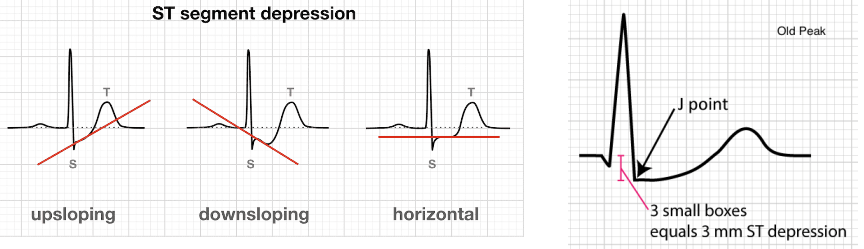

# Data Retrieval

In [7]:
df = pd.read_csv('heart.csv')
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Data Exploration

## Checking data type of each column, total number of rows and columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Basic statistics of continuous attributes

In [9]:
df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']].describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


## Checking for null values in the dataset

In [10]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Checking for Outliers
Using visualization to identify outliers

### 1. Checking Cholesterol for Outliers

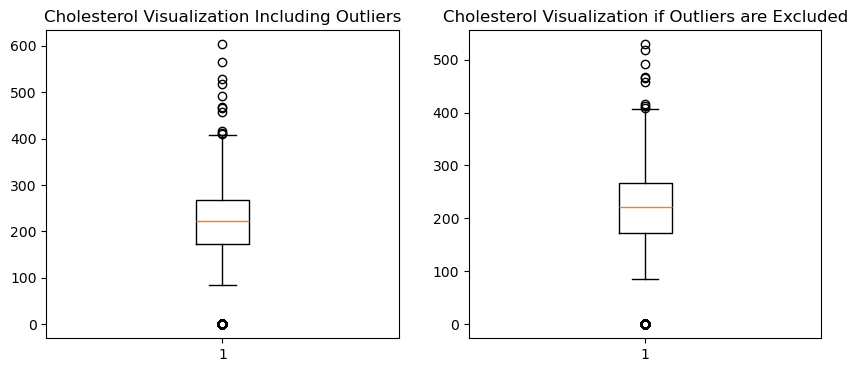

In [11]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.set_figheight(4)

axes[0].boxplot(data=df, x='Cholesterol')
axes[0].set_title('Cholesterol Visualization Including Outliers')

axes[1].boxplot(df[(df.Cholesterol<=550)]['Cholesterol'])
axes[1].set_title('Cholesterol Visualization if Outliers are Excluded');

<b>Decision:</b> We will remove cholestrol levels greater than 550 mg/dL because cholesterol levels between 350 mg/dL to 550 mg/dL are common in people who have the genetic disorder called heterozygous familial hypercholesterolemia, which affects 1 in 250 people. We will fill the missing cholesterol (cholesterol == 0) with median cholesterol.

Source 1: https://www.mayoclinic.org/tests-procedures/cholesterol-test/about/pac-20384601

Source 2: https://en.wikipedia.org/wiki/Familial_hypercholesterolemia

### 2. Checking Resting Blood Pressure for Outliers

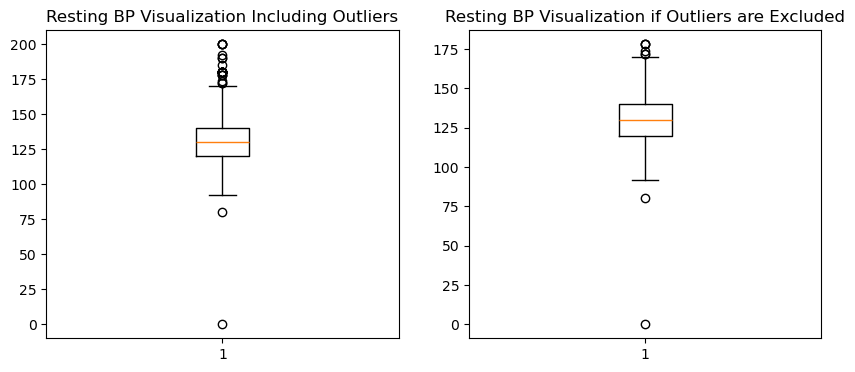

In [12]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.set_figheight(4)

axes[0].boxplot(data=df, x='RestingBP')
axes[0].set_title('Resting BP Visualization Including Outliers')

axes[1].boxplot(df[df.RestingBP<180]['RestingBP']) 
axes[1].set_title('Resting BP Visualization if Outliers are Excluded');

<b>Decision:</b> Blood pressure levels > 180 mm Hg is considered Hypertensive Crisis and is an extreme case of high blood pressure. Since our study will focus on early prediction of heart disease, we will exclude blood pressure levels > 180 mm Hg. We will also fill the missing blood pressure value (RestingBP==0) with median blood pressure.

Source: https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings)

### 3. Checking Max Heart Rate for Outliers

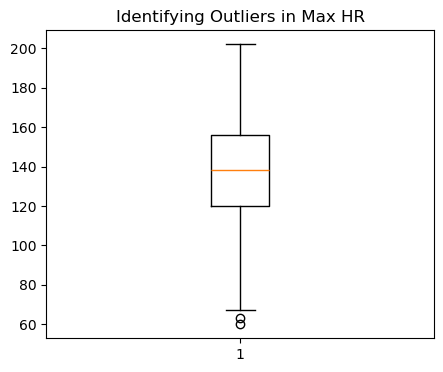

In [13]:
fig=plt.figure(figsize=(5,4))
plt.boxplot(df.MaxHR) 
plt.title('Identifying Outliers in Max HR');

<b>Decision:</b> Since the boxplot of Max Heart Rate does not show many outliers and heart rates between 60 and 70 is within reasonable range for adults, so we will keep these data.

Source: https://my.clevelandclinic.org/health/diagnostics/heart-rate

## Distribution of Continuous Attributes

### 1. Distribution of Age

Skewness of Age: -0.19561273124487544


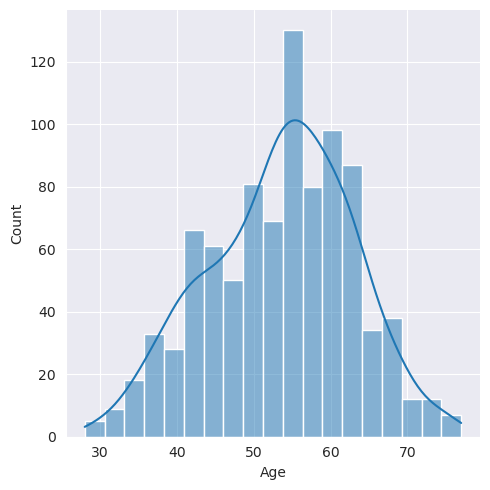

In [14]:
sns.set_style('darkgrid')
sns.displot(df, x='Age', kde=True);
skewness=stats.skew(df['Age'])
print('Skewness of Age:', skewness)

The distribution of Age values is close to normal since the skewness is almost 0.

### 2. Distribution of RestingBP

Skewness of RestingBP: 0.17954532149156327


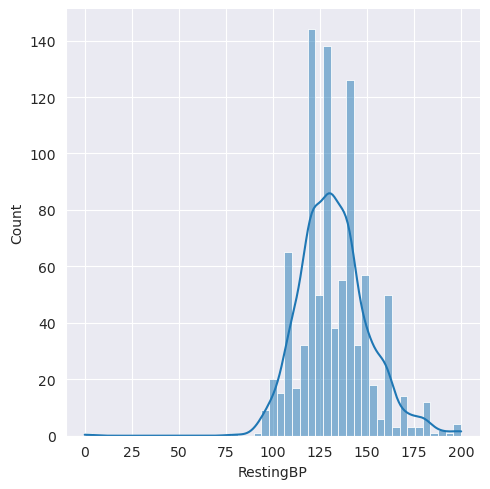

In [15]:
sns.set_style('darkgrid')
sns.displot(df, x='RestingBP', kde=True);
skewness=stats.skew(df['RestingBP'])
print('Skewness of RestingBP:', skewness)

The distribution of RestingBP values is close to normal since the skewness is almost 0.

### 3. Distribution of Cholesterol

Skewness of Cholesterol: -0.6090891046626045


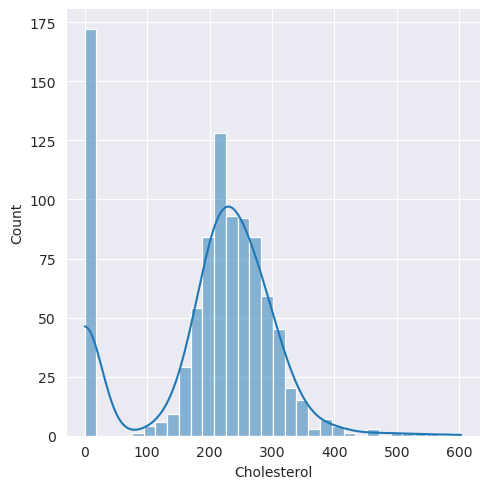

In [16]:
sns.set_style('darkgrid')
sns.displot(df, x='Cholesterol', kde=True);
skewness=stats.skew(df['Cholesterol'])
print('Skewness of Cholesterol:', skewness)

The distribution of Cholesterol values has a skewness close to 1, which indicates the data is more concentrated to the left. 

The concentration in the left tail is mainly due to cholesterol values equal to 0. We will fill 0 cholesteral values with the median value.

### 4. Distribution of MaxHR

Skewness of MaxHR: -0.14412342991429325


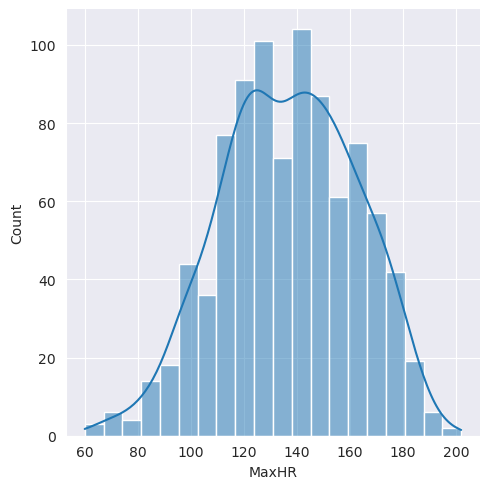

In [17]:
sns.set_style('darkgrid')
sns.displot(df, x='MaxHR', kde=True);
skewness=stats.skew(df['MaxHR'])
print('Skewness of MaxHR:', skewness)

### 5. Distribution of Oldpeak

Skewness of Oldpeak: 1.0211999031135828


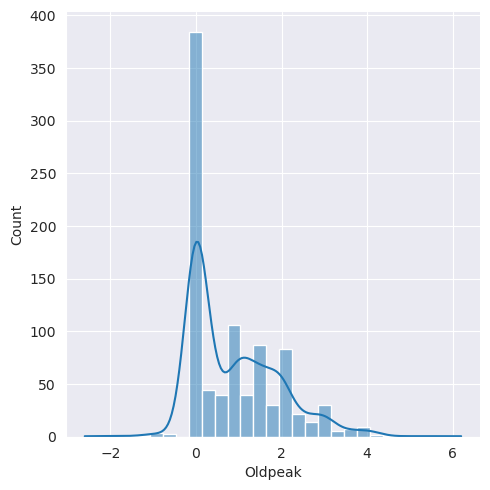

In [18]:
sns.set_style('darkgrid')
sns.displot(df, x='Oldpeak', kde=True);
skewness=stats.skew(df['Oldpeak'])
print('Skewness of Oldpeak:', skewness)

The distribution of Oldpeak values is rightly skewed since its skewness is greater than 1.

## Check Target Attribute (Percentage of Patients with HeartDisease vs. no-HeartDisease)

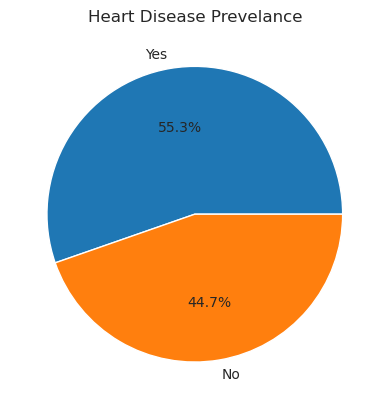

In [19]:
data = [np.size(df[df.HeartDisease==1]['HeartDisease']), np.size(df[df.HeartDisease==0]['HeartDisease'])]
plt.pie(data, labels=['Yes', 'No'], autopct='%1.1f%%')
plt.title('Heart Disease Prevelance');

The dataset is somewhat evenly balanced between patients with heart disease and patients without heart disease.

## Observing the Relationships Between Categorical Attributes and Heart Disease

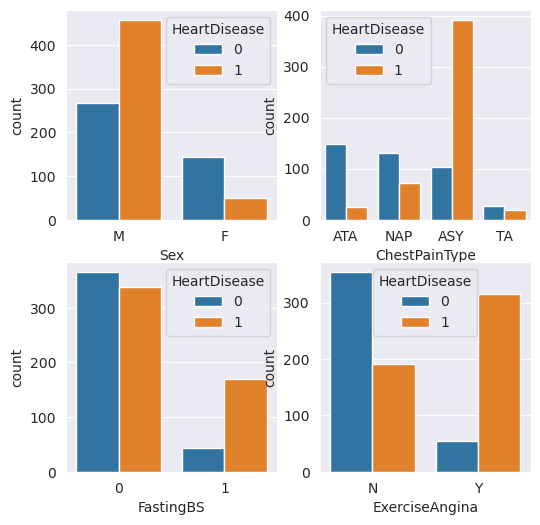

In [20]:
plt.figure(figsize=(6, 6))
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Sex', hue='HeartDisease')

plt.subplot(2, 2, 2)
sns.countplot(data=df, x='ChestPainType', hue='HeartDisease')

plt.subplot(2, 2, 3)
sns.countplot(data=df, x='FastingBS', hue='HeartDisease')

plt.subplot(2, 2, 4)
sns.countplot(data=df, x='ExerciseAngina', hue='HeartDisease')

plt.show()

<b>Observations:</b> 
- More than 50% of male patients have heart disease, while less than 30% of females have heart disease. This may indicate that male are more prone to heart disease than female.

- ASY (Asymptomatic) chest pain is the most prevalent among the patients with heart disease, while only a very small percentage of patients experienced typical check pain (TA) in both HeartDisease and No-HeartDisease group. This means that healthcare professionals need to be mindful that patients who do not experience typical chest pain may still have a high probablity of heart disease.

- Among the patient group with normal fasting blood sugar levels, nearly 50% of them have heart disease. The majority of patients with elevated fasting blood sugar levels have heart disease. More analysis will be performed.

- A significant of number of patients with heart disease experienced exercise-induced angina, while the majority of patients without heart disease do not experience exercise-induced angina. This means that ExerciseAngina may be a good indicator for heart disease.

## Observing Relationships Between Continuous Attributes and Heart Disease

We will calculate mean, median, min, max of each continuous attribute for patients with and without heart disease. We will check if there are any differences among these statistical measures for these two groups.

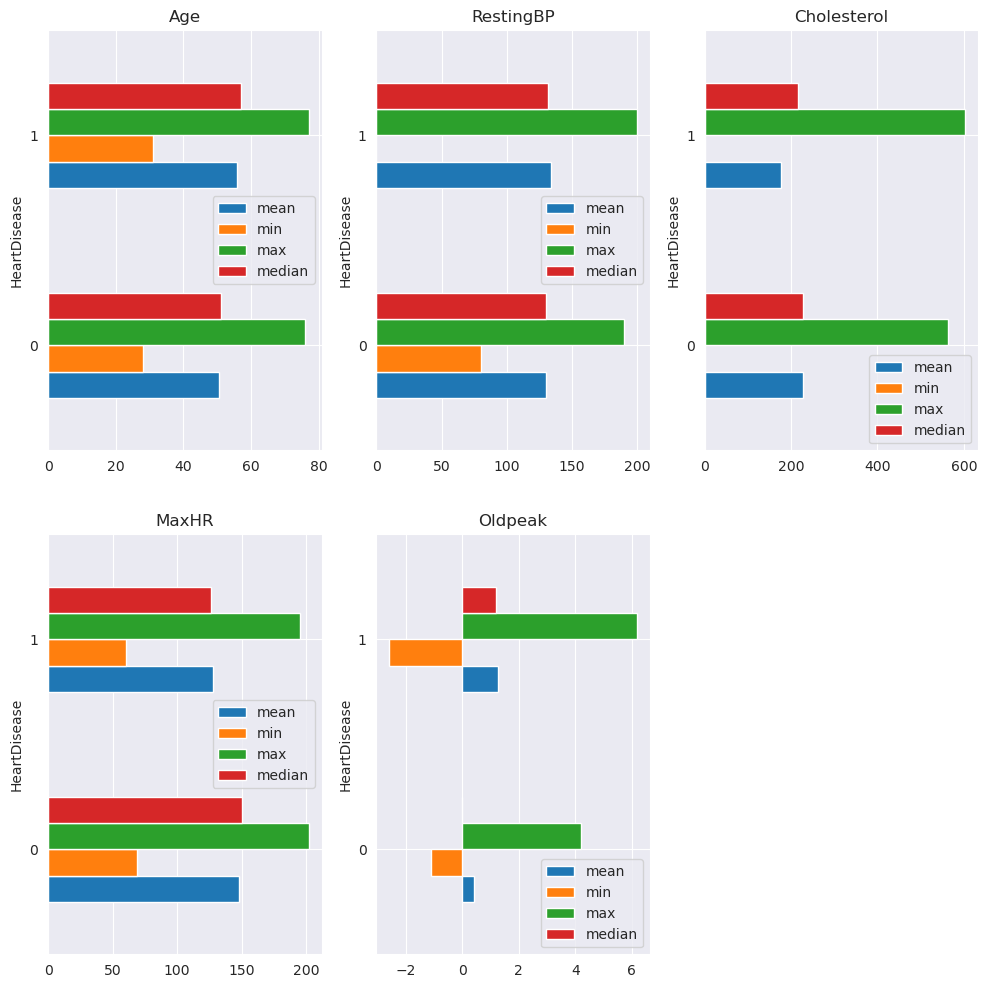

In [21]:
filter_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']
data = df[filter_cols].groupby('HeartDisease').agg(['mean', 'min', 'max', 'median'])

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 12))

axs = axs.flatten()

data['Age'].plot(kind='barh', ax=axs[0]).set_title('Age')

data['RestingBP'].plot(kind='barh', ax=axs[1]).set_title('RestingBP')

data['Cholesterol'].plot(kind='barh', ax=axs[2]).set_title('Cholesterol')

data['MaxHR'].plot(kind='barh', ax=axs[3]).set_title('MaxHR')

data['Oldpeak'].plot(kind='barh', ax=axs[4]).set_title('Oldpeak')

axs[5].axis('off');

<b>Observations:</b>\
Age: 
- All 4 statistical measures (mean, min, max, median) are about the same between two patient groups.

RestingBP: 
- the min value for patients with heart disease is 0. This is due to a missing blood pressure value in RestingBP data column. The other 3 statistical measures (mean, median, max) are about the same between two patient groups.

Cholesterol: 
- The min value is 0 for both patient groups. This is due to missing values in Cholesterol data column. 
- The mean cholesterol level is slightly higher for patients without heart disease than patients with heart disease. However, the max cholesterol level of patients with heart disease is slight higher than that of patients without heart disease. 
- The median values are about the same between two patient groups.

MaxHR: 
- Patients without heart disease have slightly higher mean, median, min and max values than patients with heart disease. This means that Max HR might be a good indicator for heart disease. Further analysis will be performed.

Oldpeak:
- Patients with heart disease have higher mean, median, and max Oldpeak than patients without heart disease. The min value is more negative or lower for patients with heart disease than patients without heart disease. Further analysis will be performed.



# Pre-processing

## Removing Outliers

1. remove rows with Cholesterol > 550 mg/dL
2. remove rows with RestingBP > 180 mm Hg

In [22]:
df=df[(df.Cholesterol<=550)]
df=df[df.RestingBP<=180]

## Handling Missing Values

1. Replace missing cholesterol values (Cholesterol == 0) with median cholesterol value

In [23]:
c=df['Cholesterol']
c_median=c[c>0].median()
df['Cholesterol']=df['Cholesterol'].replace(0,c_median)

2. Replace missing resting blood pressure value (RestingBP == 0) with median resting blood pressure value 

In [24]:
rbp_median=df[df.RestingBP!=0]['RestingBP'].median() 
df['RestingBP']=df['RestingBP'].replace(0,rbp_median)

## Data Binning
### Using MaxHR data to create a new categorical column 'MaxHR Level' based on binning

In [25]:
df['MaxHR Level'] = skp.KBinsDiscretizer(n_bins=5, encode='ordinal').fit_transform(df['MaxHR'].values.reshape(-1, 1))

In [26]:
df['MaxHR Level'].replace(0, 'Low', inplace=True)  
df['MaxHR Level'].replace(1, 'Low-Mid', inplace=True)
df['MaxHR Level'].replace(2, 'Mid', inplace=True)
df['MaxHR Level'].replace(3, 'Mid-High', inplace=True)
df['MaxHR Level'].replace(4, 'High', inplace=True)

print('MaxHR Bins:')
for e in ['Low', 'Low-Mid', 'Mid', 'Mid-High', 'High']:
    s = df[df['MaxHR Level']== e]['MaxHR']
    print(e, s.min(), '-', s.max(), 'bpm')

MaxHR Bins:
Low 60 - 114 bpm
Low-Mid 115 - 129 bpm
Mid 130 - 143 bpm
Mid-High 144 - 159 bpm
High 160 - 202 bpm


/tmp/ipykernel_1184/4286790902.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MaxHR Level'].replace(0, 'Low', inplace=True)


## Creating New Categorical Columns based on Continuous Attributes

### 1. Create a new categorical column 'BP_Stage' based on RestingBP values
'BP_Stage' column will have values 'Normal', 'Elevated', 'Hypertension Stage 1', and 'Hypertension Stage 2' based on the following RestingBP numerical values
- Normal: < 120 mm Hg
- Elevated: 120- 129 mm Hg
- Hypertension Stage 1: 130 - 139 mm Hg
- Hypertension Stage 2: 140 - 180 mm Hg

Source: https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings

In [27]:
def bpGroup(bp):
    if (bp<120):
        return('Normal')
    elif (bp>=120 and bp<=129):
        return('Elevated')
    elif (bp>=130 and bp<=139):
        return('Hypertension S1')
    else:
        return('Hypertension S2')
    
df['BP_Stage']=df['RestingBP'].apply(bpGroup)

### 2. Create a new categorical column 'Age_Group' based on Age values
'Age_Group' column will have values '20-29', '30-39', '40-49', '50-59', '60-69' and '70 - 79' based on the numerical values of 'Age' column

In [28]:
def ageGroup(a):
    if (a >= 20 and a < 30):
        return('20 - 29')
    elif (a >= 30 and a < 40):
        return('30 - 39')
    elif (a>=40 and a<50):
        return('40 - 49')
    elif (a>=50 and a<60):
        return('50 - 59')
    elif (a>=60 and a<70):
        return('60 - 69')
    else:
        return('70 - 79')
df['Age_Group']=df['Age'].apply(ageGroup)

### 3. Create a new categorical column 'Cholesterol_Level' based on Cholesterol values

'Cholesterol_Level' column will have values 'Normal', 'Elevated', 'High', and 'Very High' based on the following Cholesterol numerical values
- Normal: < 200 mg/dL
- Evelated: 200 - 239 mg/dl
- High: > 240 mg/dL
- Very High: > 350 mg/dL

Source 1: https://www.mayoclinic.org/tests-procedures/cholesterol-test/about/pac-20384601

Source 2: https://en.wikipedia.org/wiki/Familial_hypercholesterolemia

In [29]:
def cholestrolGroup(a):
    if (a < 200):
        return('Normal')
    elif (a >= 200 and a < 240):
        return('Elevated')
    elif (a >= 240 and a < 350):
        return('High')
    else:
        return('Very High')
    
df['Cholesterol_Level']=df['Cholesterol'].apply(cholestrolGroup)

## Replace Values for Categorical columns HeartDisease and FastingBS

### 1. For HeartDisease column, replace 0 with 'No' and 1 with 'Yes'.

In [30]:
df['HeartDisease']=df['HeartDisease'].replace(0,'No')
df['HeartDisease']=df['HeartDisease'].replace(1,'Yes')

### 2. For FastingBS column, replace 0 with 'Normal' and 1 with 'Elevated' 

- 0 = Normal blood sugar level (< 120 mg/dL)
- 1 = Elevated blood sugar level ( > 120 mg/dL)

Source: https://www.cdc.gov/diabetes/basics/getting-tested.html#:~:text=Fasting%20Blood%20Sugar%20Test&text=A%20fasting%20blood%20sugar%20level,higher%20indicates%20you%20have%20diabetes

In [31]:
df['FastingBS']=df['FastingBS'].replace(0,'Normal')
df['FastingBS']=df['FastingBS'].replace(1,'Elevated')

# In-Depth Analysis

NOTE: In each anlysis below, "patient group(s)" refers to one group of patients with heart disease and another group of patients without heart disease.

## 1. Relationship between Age, Sex and Heart Disease
#### We will check if there is any difference in age distribution between male and female among patients with heart disease

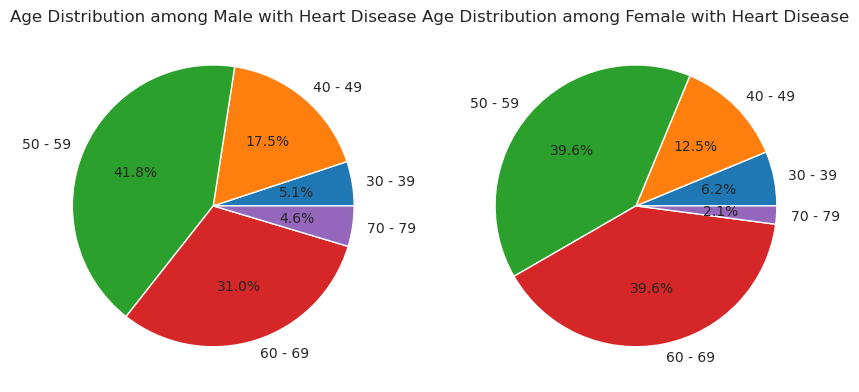

In [32]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.set_figheight(6)

mdf = df[(df.HeartDisease=='Yes') & (df.Sex=='M')].groupby('Age_Group').agg('size')
axes[0].pie(mdf, labels=mdf.index, autopct='%1.1f%%')
axes[0].set_title('Age Distribution among Male with Heart Disease')

fdf = df[(df.HeartDisease=='Yes') & (df.Sex=='F')].groupby('Age_Group').agg('size')
axes[1].pie(fdf, labels=fdf.index, autopct='%1.1f%%')
axes[1].set_title('Age Distribution among Female with Heart Disease');

<b>Observation:</b>

- For both male and female patients with heart disease, ages 50 - 59 and 60 - 69 are the 2 high risk groups prone to heart disease. 
- The next risk age group is 40 - 49 for both male and female.

This means that for both male and female, <b>age 50 - 69</b> increases the likelyhood of heart disease. Age can be a good indicator for predicting heart disease.

<hr>

## 2. Relationship between Fasting Blood Sugar Levels and Heart Disease

#### We want to see if elavated fasting blood sugar affects the likelyhood of heart disease. We will create a pivot table to compare the percentage of patients who have normal vs elevated blood suger levels within each patient group.  

In [33]:
bsdf=df.pivot_table(index='HeartDisease', columns='FastingBS', aggfunc='size')
bsdf['Total']=df.groupby('HeartDisease').agg('size')
bsdf['%_of_Elevated']=bsdf.Elevated/bsdf.Total*100
bsdf['%_of_Normal']=bsdf.Normal/bsdf.Total*100
bsdf

FastingBS,Elevated,Normal,Total,%_of_Elevated,%_of_Normal
HeartDisease,,,,,
No,44,364,408,10.784314,89.215686
Yes,166,334,500,33.200000,66.800000


In [34]:
total_elevated=sum(bsdf.Elevated)
pct_hd_elevated=(bsdf.loc['Yes', 'Elevated']/total_elevated)*100
print('Percent of patients with elevated blood sugar levels who developed heart disease: %.2f'%pct_hd_elevated,'%')

Percent of patients with elevated blood sugar levels who developed heart disease: 79.05 %


<b>Observation: </b> 
The pivot table above shows the number and the percentage of patients, with or without heart disease, at different blood sugar levels.
- Among the patients without heart disease, 10.7% of them have elevated fasting blood sugar levels (>120 mg/dL). 
- Among the patients with heart disease, 33.3% of them have elevated fasting blood sugar levels, which is 3 times as many as the patients without heart disease.
- Nearly 80% of patients with elevated blood sugar levels developed heart disease. 

This means that <b>evelatated fasting blood sugar levels </b> increases the likelyhood of heart failture and can be a good indicator for heart disease.

<hr>

## 3. Relationship between Blood Pressure Levels and Heart Disease

#### We will investigate if blood pressure levels affect the likelyhood of heart disease. We will create a heat map and a pivot table to compare the count and the percentage of patients at each blood pressure level within each patient group.  

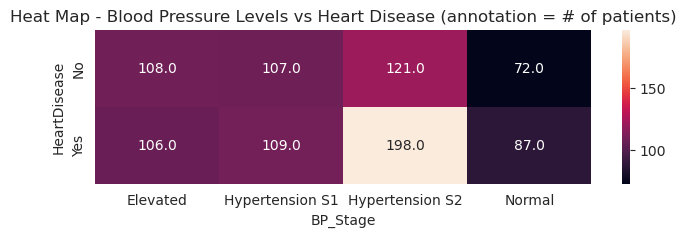

In [35]:
bpdf=df.pivot_table(index='HeartDisease', columns='BP_Stage', aggfunc='size')
plt.figure(figsize=(8, 2))
ax = sns.heatmap(bpdf, annot=True, fmt=".1f");
ax.set_title('Heat Map - Blood Pressure Levels vs Heart Disease (annotation = # of patients)');

In [36]:
bpdf['Total']=df.groupby('HeartDisease').agg('size')
bpdf['%_of_Hypertension_S2']=(bpdf['Hypertension S2']/bpdf.Total)*100
bpdf

BP_Stage,Elevated,Hypertension S1,Hypertension S2,Normal,Total,%_of_Hypertension_S2
HeartDisease,,,,,,
No,108,107,121,72,408,29.656863
Yes,106,109,198,87,500,39.600000


In [37]:
total_h2=sum(bpdf['Hypertension S2'])
pct_hd_h2=(bpdf.loc['Yes', 'Hypertension S2']/total_h2)*100
print('Percent of patients with hypertension stage 2 who developed heart disease: %.2f'%pct_hd_h2,'%')

Percent of patients with hypertension stage 2 who developed heart disease: 62.07 %


<b>Observation:</b> The heatmap and the pivot table above show the number and the percentage of patients, with or without heart disease, at different blood pressure levels.
- The number of patients with elevated or hypertension stage 1 blood pressure levels are about the same between 2 patient groups. 
- Among the patients without heart disease, 29.7% of them have hypertension stage 2. 
- Among the patients with heart disease, nearly 40% of them have hypertension stage 2, which is 10% more than the group without heart disease. 
- Among all patients with hypertension stage 2, 60% of them developed heart disease. 

This means that blood pressure with <b>hypertension stage 2</b> increases the likelyhood of heart failure and can be a good indicator for predicting heart disease.

<hr>

## 4. Relationship between Cholesterol Levels and Heart Disease
#### We will investigate if there is any difference in cholestrol level distribution between each patient group.

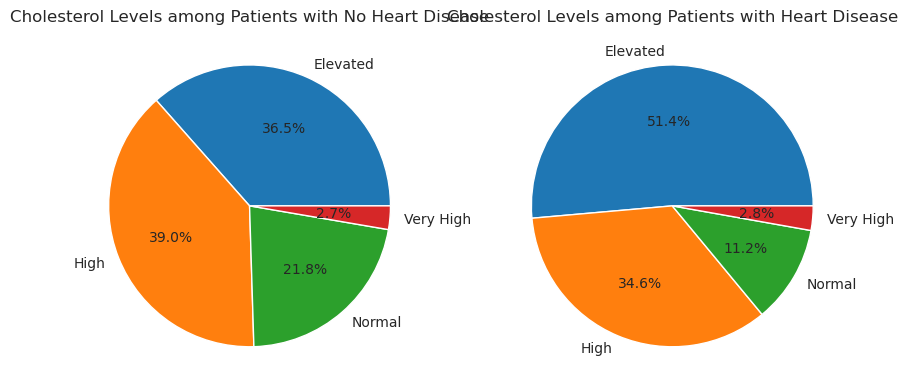

In [38]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.set_figheight(6)

nhd_df = df[df.HeartDisease=='No'].groupby('Cholesterol_Level').agg('size')
axes[0].pie(nhd_df, labels=nhd_df.index, autopct='%1.1f%%')
axes[0].set_title('Cholesterol Levels among Patients with No Heart Disease');

hd_df = df[df.HeartDisease=='Yes'].groupby('Cholesterol_Level').agg('size')
axes[1].pie(hd_df, labels=hd_df.index, autopct='%1.1f%%')
axes[1].set_title('Cholesterol Levels among Patients with Heart Disease');

<b>Observation:</b>
- Among the patients without heart disease, 73.5% of them have Elevated or High cholesterol levels, while 86% of patients with heart disease have the same cholesterol levels, which is 10% more than patients without heart disease.
- The number of patients with Very High cholesterol levels are about the same for patients with or without heart disease.

This means Cholesterol may be associated with heart disease, but is not a strong risk factor for heart disease.

<hr>

## 5. Relationship between Max Heart Rate (achieved during exercise) and Heart Disease

#### 1) We want to see if there is any difference in Max Heart Rate distribution between each patient group. 

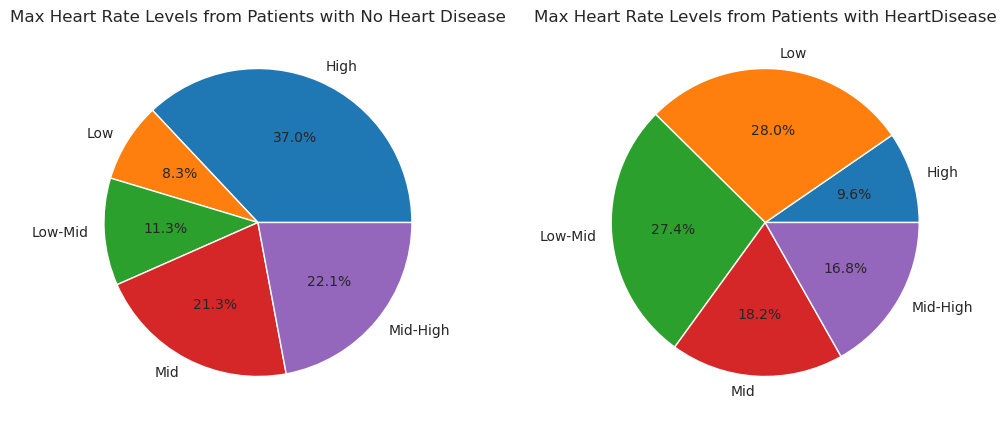

In [39]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(5)

nhd_df = df[df.HeartDisease=='No'].groupby('MaxHR Level').agg('size')
axes[0].pie(nhd_df, labels=nhd_df.index, autopct='%1.1f%%')
axes[0].set_title('Max Heart Rate Levels from Patients with No Heart Disease');

hd_df = df[df.HeartDisease=='Yes'].groupby('MaxHR Level').agg('size')
axes[1].pie(hd_df, labels=hd_df.index, autopct='%1.1f%%')
axes[1].set_title('Max Heart Rate Levels from Patients with HeartDisease');

<b>Observation:</b> 
- Patients without heart disease are able to achieve higher maximum heart rates during exercise than patients with heart disease. 
- 59.1% of patients without heart disease achieved Mid-High and High max heart rates, while less than 30% of patients with heart disease achieved the same max heart rate levels. 
- More than half (55.4%) of patients with heart disease reached Low and Low-Mid max heart rates, while only 19.6% of patients without heart disease reached the same heart rate levels.

This means that max heart rate is a good indicator can be a good indicator of predicting heart disease.

#### 2)  Next, we will investigate what levels of Max Heart Rate patients from different age group were able to achieve and if any difference between male and female patients.</b>

/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


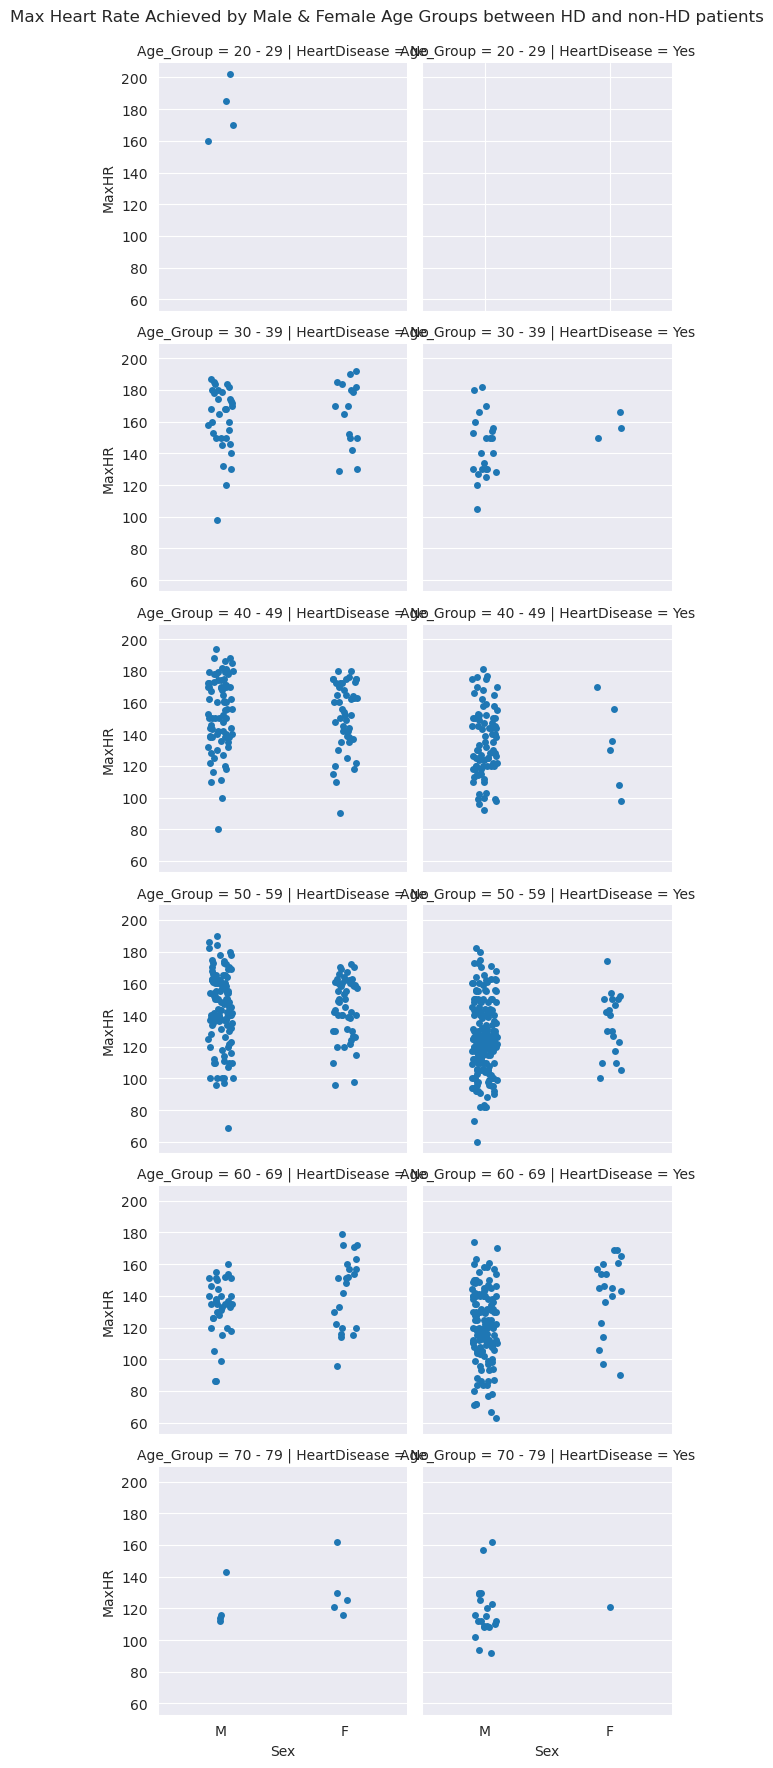

In [40]:
r_order=['20 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79']
g=sns.FacetGrid(data=df, col='HeartDisease', row='Age_Group', row_order=r_order).map(sns.stripplot, 'Sex', 'MaxHR')
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Max Heart Rate Achieved by Male & Female Age Groups between HD and non-HD patients');

<b>Observations:</b>
- In age group 30 - 39, 40 - 49, and 50 - 59, both male and female patients without heart disease were able to achieve higher maximum heart rates during exercise than patients with heart disease. 
- In age group 60 - 69, most male without heart disease achieved higher heart rate (in the range of 120-160), but for male with heart disease, about half of them achieved lower heart rate (< below 120). In addition, more female patients achieved higher max heart rate than male patients in both patient groups.

This means that <b>low maximum heart rates, especially female at age 40 - 59 and male at age 40 - 69</b>, can be a good indicator for heart disease.

<hr>

## 6. Relationship between Resting ECG, ST Drepression Slope, Oldpeak and Heart Disease

#### 1) We will compare Resting ECG against exercise ECG (ST_Slop) and see how each of them is associated with HeartDisease

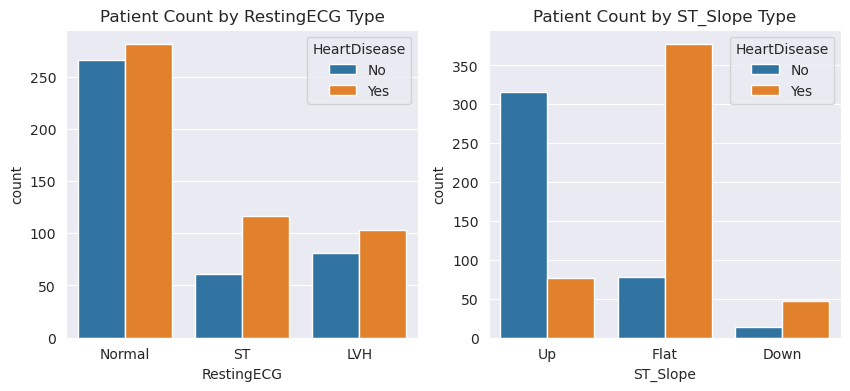

In [41]:
fig, ax = plt.subplots(1,2, figsize=(10, 4))
sns.countplot(df, x='RestingECG', hue='HeartDisease', ax=ax[0])
sns.countplot(df, x='ST_Slope', hue='HeartDisease', ax=ax[1])
ax[0].set_title('Patient Count by RestingECG Type');
ax[1].set_title('Patient Count by ST_Slope Type');

<b>Observations:</b>

Based on the RestingECG chart, 
- Among the patients who had Normal or LVH (left ventricular hypertrophy) resting ECG types, the number of patients with or without heart disease is evenly divided. 
- Within the ST (ST-T wave abnormality) RestingECG type about 2/3 of these patients developed heart disease.
- Overall, RestingECG is not as a strong indicator for heart disease .

Based on the ST_Slope chart,
- Among the patients without heart disease, the majority of them had a Up ST_Slope on their exercise ECG.
- Among the patients who have heart disease, the majority of them had a Flat ST_Slope on their exercise ECG . 
- This means <b>Flat ST_Slope</b> is a good indicator for predicting heart disease.

#### 2) We will investigate if there is any difference in Oldpeak and ST_Slope induced by Exercise ECG between two patient groups and how they are related to the RestECG type that the patients exhibited.

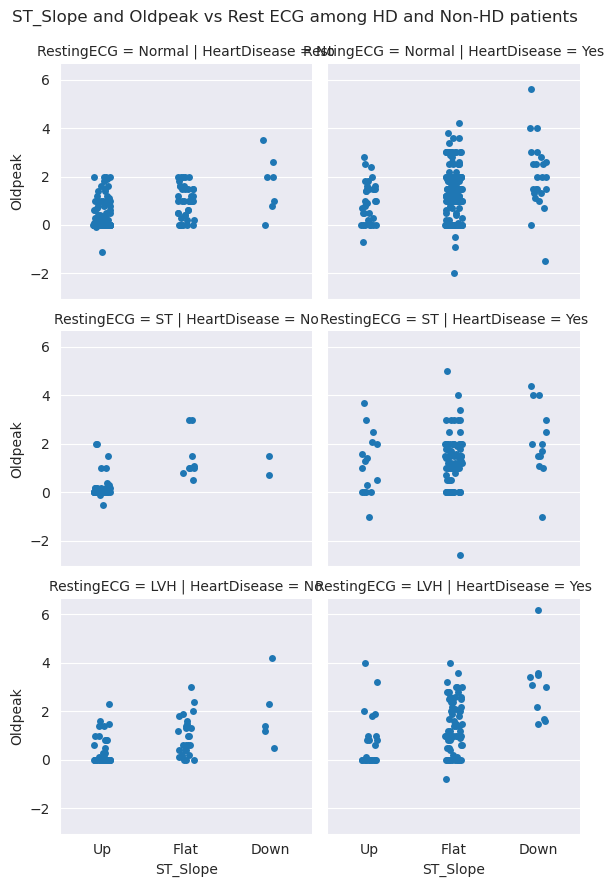

In [42]:
x_order=df.ST_Slope.unique()
g = sns.FacetGrid(data=df, col='HeartDisease', row='RestingECG').map(sns.stripplot, 'ST_Slope', 'Oldpeak', order=x_order);
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('ST_Slope and Oldpeak vs Rest ECG among HD and Non-HD patients');

<b>Observations:</b>
- For patients without heart disease, the majority of them had an Up or Flat ST_Slope with Oldpeak of 0 - 2 mm, regardless of their resting ECG result.
- For patients with heart disease, the majority of them had a Flat ST_Slope with Oldpeak of 0 - 3 mm during their exercise ECG test, regardless of their resting ECG result.
- Out of all patients who had Flat ST_Slope during exercise ECG test, a significant number of them had heart disease with Oldpeak ranging 0 - 3mm, regardless of their resting ECG result.
- Out of all patients who had Down ST_Slope during exercise ECG test, more than half of them had heart disease and their old peaks ranged 1 - 4 mm which is higher than patients with heart disease and Flat ST_Slope.
- There is no clear association between Resting ECG features and Exercise ECG features.

This means that <b>Flat ST_Slope with oldpeak range of 0 - 3 mm and Down ST_Slope with oldpeak range of 1 - 4mm </b> can be a good indicator for heart disease.

## 7. Pearson's Correlations between Age & RestingBP,  Age & MaxHR

#### 1) We will perform Pearson's Correlation test to see if there is any linear correlation between Age and RestingBP among all patients, as well as for each patient group</b>

Age vs. RestingBP for All Patients:
 PearsonRResult(statistic=0.27053272176387755, pvalue=1.0774655761955517e-16)

Age vs. RestingBP for Patients w/o Heart Disease:
 PearsonRResult(statistic=0.2246217326393664, pvalue=4.607756212002305e-06)

Age vs. RestingBP for Patients w/ Heart Disease:
 PearsonRResult(statistic=0.27753253407170325, pvalue=2.7059448869623947e-10)


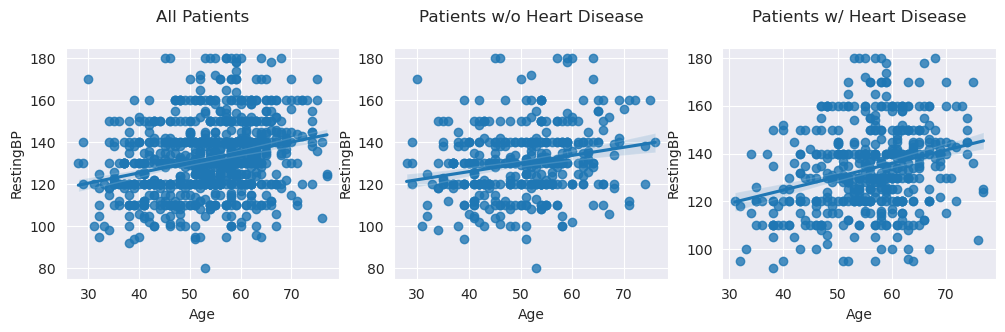

In [43]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
axs = axs.flatten()

sns.regplot(df, x='Age', y='RestingBP', ax=axs[0])
sns.regplot(df[df.HeartDisease=='No'], x='Age', y='RestingBP', ax=axs[1])
sns.regplot(df[df.HeartDisease=='Yes'], x='Age', y='RestingBP', ax=axs[2])

axs[0].set_title('All Patients\n')
axs[1].set_title('Patients w/o Heart Disease\n')
axs[2].set_title('Patients w/ Heart Disease\n');

hd_df=df[df.HeartDisease=='Yes']
nhd_df=df[df.HeartDisease=='No']
print('Age vs. RestingBP for All Patients:\n', stats.pearsonr(df.RestingBP, df.Age))
print('\nAge vs. RestingBP for Patients w/o Heart Disease:\n', stats.pearsonr(nhd_df.RestingBP, nhd_df.Age))
print('\nAge vs. RestingBP for Patients w/ Heart Disease:\n', stats.pearsonr(hd_df.RestingBP, hd_df.Age))

<b>Observations:</b>
- Since the Pearson's Correlation Coefficient (r-value) is between 0.2 - 0.3 for each of the test groups, this means that there is a weak positive linear correlation between age and resting blood pressure. This is also supported by the regression plots since each plot contains data points that are scattered in a general positive direction but not concentrated along the regression lines. This means Age and RestingBP are not strongly correlated.
- The weak positive association between Age and RestingBP means that as a patient's age increases, his/her resting blood pressure may increase as well regardless if the patient has heart disease or not.  

#### 2) We will perform Pearson's Correlation test to see if there is any linear correlation between Age and MaxHR among all patients, as well as for each patient group</b>

Age vs. MaxHR for All Patients:
 PearsonRResult(statistic=-0.38756748184597944, pvalue=6.467564930446489e-34)

Age vs. MaxHR for Patients w/o Heart Disease:
 PearsonRResult(statistic=-0.38639475982600396, pvalue=5.610896133584493e-16)

Age vs. MaxHR for Patients w/ Heart Disease:
 PearsonRResult(statistic=-0.24736330349629732, pvalue=2.0861530770631053e-08)


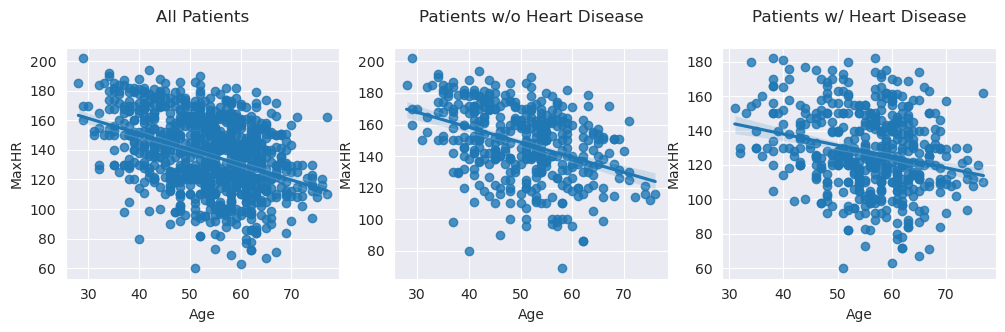

In [44]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
axs = axs.flatten()

sns.regplot(df, x='Age', y='MaxHR', ax=axs[0])
sns.regplot(df[df.HeartDisease=='No'], x='Age', y='MaxHR', ax=axs[1])
sns.regplot(df[df.HeartDisease=='Yes'], x='Age', y='MaxHR', ax=axs[2])

axs[0].set_title('All Patients\n')
axs[1].set_title('Patients w/o Heart Disease\n')
axs[2].set_title('Patients w/ Heart Disease\n');

hd_df=df[df.HeartDisease=='Yes']
nhd_df=df[df.HeartDisease=='No']
print('Age vs. MaxHR for All Patients:\n', stats.pearsonr(df.MaxHR, df.Age))
print('\nAge vs. MaxHR for Patients w/o Heart Disease:\n', stats.pearsonr(nhd_df.MaxHR, nhd_df.Age))
print('\nAge vs. MaxHR for Patients w/ Heart Disease:\n', stats.pearsonr(hd_df.MaxHR, hd_df.Age))

<b>Observations:</b>
- Since the Pearson's Correlation Coefficient (r-value) is between -0.2 and -0.4 for each of the test groups, this means that there is a weak negative linear correlation between age and maximum heart rate achieved during exercise. This is also supported by the regression plots since each plot contains data points that are scattered in a general negative direction but not concentrated along the regression lines. This means Age and MaxHR are not strongly correlated.
- The weak negative association between Age and MaxHR means that as a patient's age increases, the maximum heart rate the patient can achieve during exercise may decrease regardless if the patient has heart disease or not.  

## 8. Chi-squared tests for Categorical attributes

#### We will perform chi-squared test of independence between each categorical attribute ('Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope') and Heart Disease

<b>Null hypothesis:</b> there is no relationship between each categorical attribute and HeartDisease.

In [45]:
index_list=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for i in index_list:
    pt=df.pivot_table(index=i, columns='HeartDisease', aggfunc='size')
    print(pt)
    chi2 = stats.chi2_contingency(pt)
    print('Chi-Square Test of Independence for ', i, ' vs HeartDisease: p-value =', chi2.pvalue,'\n')

HeartDisease   No  Yes
Sex                   
F             142   48
M             266  452
Chi-Square Test of Independence for  Sex  vs HeartDisease: p-value = 3.40897404877257e-20 

HeartDisease    No  Yes
ChestPainType          
ASY            104  386
ATA            148   23
NAP            130   71
TA              26   20
Chi-Square Test of Independence for  ChestPainType  vs HeartDisease: p-value = 3.423215851874408e-57 

HeartDisease   No  Yes
RestingECG            
LVH            81  103
Normal        266  281
ST             61  116
Chi-Square Test of Independence for  RestingECG  vs HeartDisease: p-value = 0.004247791467693466 

HeartDisease     No  Yes
ExerciseAngina          
N               353  190
Y                55  310
Chi-Square Test of Independence for  ExerciseAngina  vs HeartDisease: p-value = 2.464597357732198e-49 

HeartDisease   No  Yes
ST_Slope              
Down           14   47
Flat           78  377
Up            316   76
Chi-Square Test of Independence for 

<b>Observations:</b>
- Since each p-value of chi-squared test is less than 0.05, we reject the null hypothesis for each categorical attribute. We can conclude that there is some relationship between each of these attributes and HeartDisease.

# Machine Learning Model
- Based on our analysis above, each categorical and continuous attribute in the dataset has some association with Heart Disease, so we will use all of them in our ML model. 
- We will use a K-Nearest Neighbors model to predict heart disease.

### 1. Looking at the data

In [46]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,MaxHR Level,BP_Stage,Age_Group,Cholesterol_Level
0,40,M,ATA,140,289,Normal,Normal,172,N,0.0,Up,No,High,Hypertension S2,40 - 49,High
1,49,F,NAP,160,180,Normal,Normal,156,N,1.0,Flat,Yes,Mid-High,Hypertension S2,40 - 49,Normal
2,37,M,ATA,130,283,Normal,ST,98,N,0.0,Up,No,Low,Hypertension S1,30 - 39,High
3,48,F,ASY,138,214,Normal,Normal,108,Y,1.5,Flat,Yes,Low,Hypertension S1,40 - 49,Elevated
4,54,M,NAP,150,195,Normal,Normal,122,N,0.0,Up,No,Low-Mid,Hypertension S2,50 - 59,Normal


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 908 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                908 non-null    int64  
 1   Sex                908 non-null    object 
 2   ChestPainType      908 non-null    object 
 3   RestingBP          908 non-null    int64  
 4   Cholesterol        908 non-null    int64  
 5   FastingBS          908 non-null    object 
 6   RestingECG         908 non-null    object 
 7   MaxHR              908 non-null    int64  
 8   ExerciseAngina     908 non-null    object 
 9   Oldpeak            908 non-null    float64
 10  ST_Slope           908 non-null    object 
 11  HeartDisease       908 non-null    object 
 12  MaxHR Level        908 non-null    object 
 13  BP_Stage           908 non-null    object 
 14  Age_Group          908 non-null    object 
 15  Cholesterol_Level  908 non-null    object 
dtypes: float64(1), int64(4), object

### 2. Only keeping necessary attributes

In [48]:
knnDF = df.drop(['MaxHR Level', 'BP_Stage', 'Age_Group', 'Cholesterol_Level'], axis=1)

In [49]:
knnDF.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,Normal,Normal,172,N,0.0,Up,No
1,49,F,NAP,160,180,Normal,Normal,156,N,1.0,Flat,Yes
2,37,M,ATA,130,283,Normal,ST,98,N,0.0,Up,No
3,48,F,ASY,138,214,Normal,Normal,108,Y,1.5,Flat,Yes
4,54,M,NAP,150,195,Normal,Normal,122,N,0.0,Up,No


In [50]:
knnDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 908 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             908 non-null    int64  
 1   Sex             908 non-null    object 
 2   ChestPainType   908 non-null    object 
 3   RestingBP       908 non-null    int64  
 4   Cholesterol     908 non-null    int64  
 5   FastingBS       908 non-null    object 
 6   RestingECG      908 non-null    object 
 7   MaxHR           908 non-null    int64  
 8   ExerciseAngina  908 non-null    object 
 9   Oldpeak         908 non-null    float64
 10  ST_Slope        908 non-null    object 
 11  HeartDisease    908 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 92.2+ KB


### 3. Ensuring appropriate dtypes for knnDF

In [51]:
def convertObjects(x):
    if x.dtype == 'O': return x.astype('string')
    else: return x

knnDF = knnDF.apply(convertObjects)
knnDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 908 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             908 non-null    int64  
 1   Sex             908 non-null    string 
 2   ChestPainType   908 non-null    string 
 3   RestingBP       908 non-null    int64  
 4   Cholesterol     908 non-null    int64  
 5   FastingBS       908 non-null    string 
 6   RestingECG      908 non-null    string 
 7   MaxHR           908 non-null    int64  
 8   ExerciseAngina  908 non-null    string 
 9   Oldpeak         908 non-null    float64
 10  ST_Slope        908 non-null    string 
 11  HeartDisease    908 non-null    string 
dtypes: float64(1), int64(4), string(7)
memory usage: 92.2 KB


### 4. Converting all categorical attributes to numerical attributes using encoding and binarization

In [52]:
import sklearn.preprocessing as skp

knnDF['Sex_M'] = skp.LabelEncoder().fit_transform(knnDF['Sex'])
knnDF[['ST_Slope_Up', 'ST_Slope_Flat', 'ST_Slope_Down']] = skp.LabelBinarizer().fit_transform(knnDF['ST_Slope'])
knnDF[['ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_ASY', 'ChestPainType_TA']] = skp.LabelBinarizer().fit_transform(knnDF['ChestPainType'])
knnDF['FastingBS'] = knnDF['FastingBS'].replace('Normal', '0').replace('Elevated', '1').astype('int')
knnDF[['RestingECG_Normal', 'RestingECG_ST', 'RestingECG_LVH']] = skp.LabelBinarizer().fit_transform(knnDF['RestingECG'])
knnDF['ExerciseAngina'] = skp.LabelEncoder().fit_transform(knnDF['ExerciseAngina'])
knnDF['HeartDisease'] = knnDF['HeartDisease'].replace('No', '0').replace('Yes', '1').astype('int')

knnDF.drop(['Sex', 'ST_Slope', 'ChestPainType', 'RestingECG'], axis=1, inplace=True)
knnDF.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Sex_M,ST_Slope_Up,ST_Slope_Flat,ST_Slope_Down,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_ASY,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,RestingECG_LVH
0,40,140,289,0,172,0,0.0,0,1,0,0,1,0,1,0,0,0,1,0
1,49,160,180,0,156,0,1.0,1,0,0,1,0,0,0,1,0,0,1,0
2,37,130,283,0,98,0,0.0,0,1,0,0,1,0,1,0,0,0,0,1
3,48,138,214,0,108,1,1.5,1,0,0,1,0,1,0,0,0,0,1,0
4,54,150,195,0,122,0,0.0,0,1,0,0,1,0,0,1,0,0,1,0


### 5. Normalizing continuous data

In [53]:
import sklearn.preprocessing as skp

knnDF['Age'] = skp.MinMaxScaler().fit_transform(knnDF['Age'].values.reshape(-1, 1))
knnDF['RestingBP'] = skp.MinMaxScaler().fit_transform(knnDF['RestingBP'].values.reshape(-1, 1))
knnDF['Cholesterol'] = skp.MinMaxScaler().fit_transform(knnDF['Cholesterol'].values.reshape(-1, 1))
knnDF['MaxHR'] = skp.MinMaxScaler().fit_transform(knnDF['MaxHR'].values.reshape(-1, 1))
knnDF.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Sex_M,ST_Slope_Up,ST_Slope_Flat,ST_Slope_Down,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_ASY,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,RestingECG_LVH
0,0.244898,0.60,0.459459,0,0.788732,0,0.0,0,1,0,0,1,0,1,0,0,0,1,0
1,0.428571,0.80,0.213964,0,0.676056,0,1.0,1,0,0,1,0,0,0,1,0,0,1,0
2,0.183673,0.50,0.445946,0,0.267606,0,0.0,0,1,0,0,1,0,1,0,0,0,0,1
3,0.408163,0.58,0.290541,0,0.338028,1,1.5,1,0,0,1,0,1,0,0,0,0,1,0
4,0.530612,0.70,0.247748,0,0.436620,0,0.0,0,1,0,0,1,0,0,1,0,0,1,0


### 6. Defining the KNN model

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as m 

# defining x and y
X = knnDF.drop('HeartDisease', axis=1)
Y = knnDF['HeartDisease']

# splitting train/test data
x_train, x_test, y_train, y_test = train_test_split(X, Y)

n = np.sqrt(np.size(knnDF.index)).astype('int')
model = KNeighborsClassifier(n)

model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=30)

### 7. Testing the model with test data

Accuracy Score: 0.8634361233480177


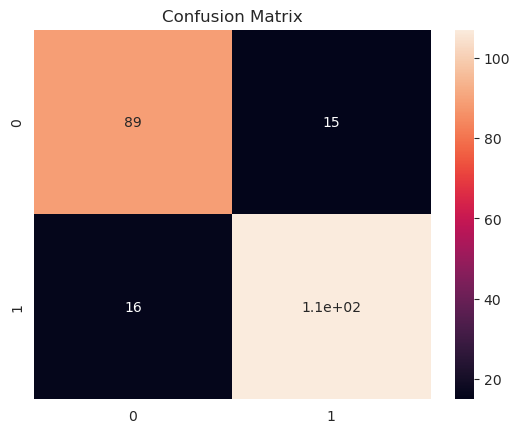

In [55]:
# This code requires sklearn 1.4.0 or higher. Otherwise, it will generate error 
y_hat = model.predict(x_test)

cm = m.confusion_matrix(y_test, y_hat)
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix');
print(f'Accuracy Score: {m.accuracy_score(y_test, y_hat)}')

### 8. Plotting the learning curves

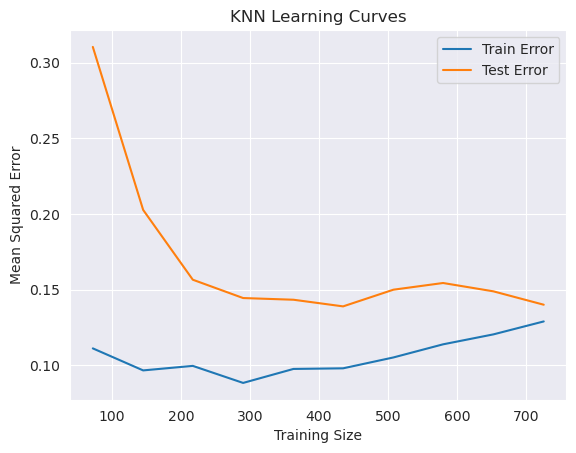

In [56]:
# This code requires sklearn 1.4.0 or higher. Otherwise, it will generate error 
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, Y, train_sizes=np.linspace(.1, 1, 10), scoring='neg_mean_squared_error')
train_mean_score = -np.mean(train_scores, axis=1)
test_mean_score = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean_score, label='Train Error')
plt.plot(train_sizes, test_mean_score, label='Test Error')
plt.title('KNN Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error')
plt.legend(loc=1);

# Conclusion:

<b>Based on our thorough statistical analysis, the following attributes and criteria will help healthcare professionals predict how likely a patient will develope heart disease:</b>
- <b>Sex:</b>  males are more prone to heart disease than females
- <b>Age:</b>  patients at age 50 - 69 are more likely to have heart disease than other age groups
- <b>Fasting Blood Sugar:</b>  people with elevated fasting blood sugar level ( > 120 mg/dL) are more likely to have heart disease 
- <b>Resting Blood Pressure:</b>  people with blood pressure > 140 mm Hg (Hypertension Stage 2) are more likely to have heart disease
- <b>Maximum Heart Rate:</b>  people who are unable to achieve higher or target max heart rates during physical activities, especially female at age 40 - 59 and male at age 40 - 69, are more likely to develope heart disease
- <b>Exercise ECG:</b> people who have ST depression with a Flat ST Slope and oldpeak range of 0 - 3mm or with a Down ST Slope and oldpeak range of 1-4mm are more likely to have heart disease.
- <b>Exercise-induced Angina:</b> people who experience angina (chest pain) during physical acitivies are more likely to have heart disease

<b>Recommendations to healthcare professionals when evaluating a patient's probability of developing heart disease:</b>
- Doctors should take the patient's sex and age into consideration. 
- Doctors should test the patient for Fasting Blood Sugar and Resting Blood Presure.
- Doctors should perform exercise ECG on the patient and check for ST depression with flat or downward slope and the magnitude of depression (old peak)
- Doctors should check the maximum heart rate that the patient can achieve during exercise test and compare it against the target heart rate for the patient's age group published by American Heart Association. 
- Doctors should check if the patient experiences any angina during the exercise test
- Even if the patient does not experience any typical check pain, doctors should be mindful that patients with Asymptomatic chest pain can also have heart failure (aka silent heart attack)

Source1: https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates
    
Source2: https://www.mayoclinic.org/diseases-conditions/heart-attack/expert-answers/silent-heart-attack/faq-20057777
    
<b>Machine Learning Prediction Model:</b>
- Our KNN model has a   <b>final accuracy of ~87.22%</b>
- <b>Important Features used in the model:</b>    Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope  
- From the learning curves we can see the model does not show signs of extreme overfitting, which indicates it is good for use with new data